Utilizes a linear regression model to predict wheel speed from pwm. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
1. Clean Dataset, assign feature/label, split train/test
"""

df = pd.read_csv("Motor_A.csv", header=1, encoding="utf-8-sig")

pairs = []

for i in range(14):   # motors 0 through 13
    if i == 0:
        pwm_col = "PWM"
        vel_col = "Velocity"
    else:
        pwm_col = f"PWM.{i}"
        vel_col = f"Velocity.{i}"

    temp = df[[pwm_col, vel_col]].copy()
    temp.columns = ["PWM", "Velocity"] 
    temp["PWM"] = pd.to_numeric(temp["PWM"], errors="coerce")
    temp["Velocity"] = pd.to_numeric(temp["Velocity"], errors="coerce")
    temp = temp.dropna()

    pairs.append(temp)

df_clean = pd.concat(pairs, ignore_index=True)

X = df_clean[["PWM"]].values
y = df_clean["Velocity"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(df_clean.dtypes)
print(df_clean.head())
print(df_clean.shape)


PWM         float64
Velocity    float64
dtype: object
   PWM  Velocity
0  0.0       0.0
1  0.0       0.0
2  0.0       0.0
3  0.0       0.0
4  0.0       0.0
(30622, 2)


[SKLearn] slope=1.966050, intercept=76.397747
[SKLearn] MSE train=5841.267759
[SKLearn] MSE test =5798.879777


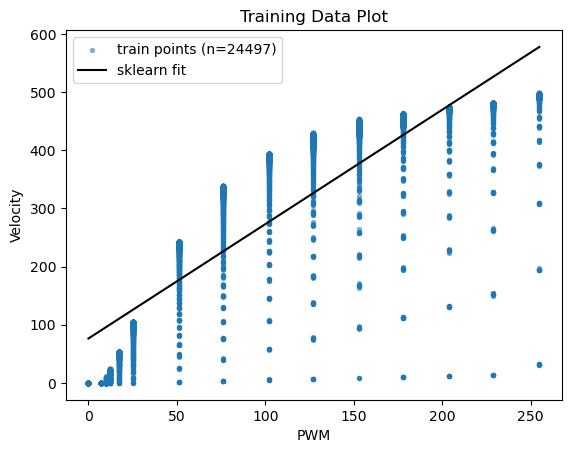

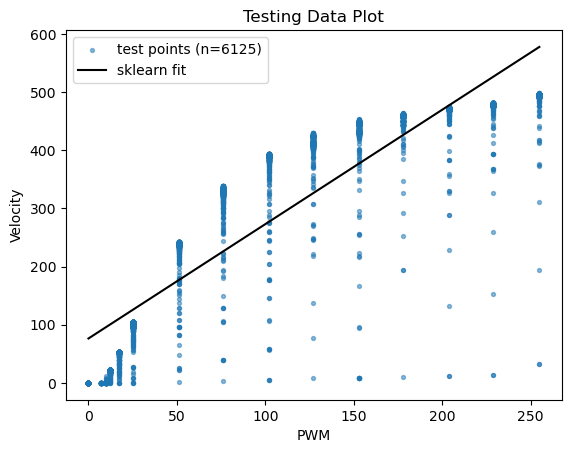

In [42]:
"""
2. Scikit Learn Regression Model
"""

sk_model = LinearRegression()
sk_model.fit(X_train, y_train)

y_train_pred_sk = sk_model.predict(X_train)
y_test_pred_sk = sk_model.predict(X_test)

mse_train_sk = mean_squared_error(y_train, y_train_pred_sk)
mse_test_sk = mean_squared_error(y_test, y_test_pred_sk)

print(f"[SKLearn] slope={sk_model.coef_[0]:.6f}, intercept={sk_model.intercept_:.6f}")
print(f"[SKLearn] MSE train={mse_train_sk:.6f}")
print(f"[SKLearn] MSE test ={mse_test_sk:.6f}")

# Line for plotting
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line_sk = sk_model.predict(x_line)

plt.title("Training Data Plot")
plt.scatter(X_train, y_train, s=8, alpha=0.5, label=f"train points (n={len(X_train)})")
plt.plot(x_line, y_line_sk, color="black", label="sklearn fit")
plt.xlabel("PWM")
plt.ylabel("Velocity")
plt.legend()
plt.show()

plt.title("Testing Data Plot")
plt.scatter(X_test, y_test, s=8, alpha=0.5, label=f"test points (n={len(X_test)})")
plt.plot(x_line, y_line_sk, color="black", label="sklearn fit")
plt.xlabel("PWM")
plt.ylabel("Velocity")
plt.legend()
plt.show()


Linear Regression (Scikit-Learn) + MSE


[Normal Eq] slope=1.966050, intercept=76.397747
[Normal Eq] MSE train=5841.267759


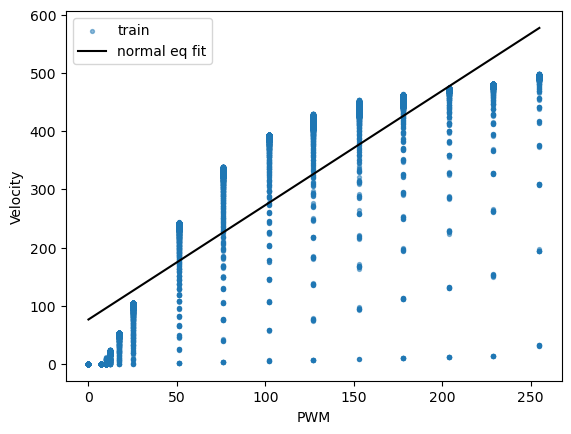

In [ ]:
"""
3. Normal Equations Regression Model
"""

# Build design matrix from TRAINING data
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

theta_ne, *_ = np.linalg.lstsq(X_train_b, y_train, rcond=None)

intercept_ne = float(theta_ne[0])
slope_ne = float(theta_ne[1])

print(f"[Normal Eq] slope={slope_ne:.6f}, intercept={intercept_ne:.6f}")

# Train predictions + MSE

y_train_pred_ne = X_train_b @ theta_ne
mse_train_ne = mean_squared_error(y_train, y_train_pred_ne)
print(f"[Normal Eq] MSE train={mse_train_ne:.6f}")

# Plot training data + normal equation fit
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line_ne = intercept_ne + slope_ne * x_line

plt.scatter(X_train, y_train, s=8, alpha=0.5, label="train")
plt.plot(x_line, y_line_ne, color="black", label="normal eq fit")
plt.xlabel("PWM")
plt.ylabel("Velocity")
plt.legend()
plt.show()

[SKLearn] Test MSE: 5798.879777
[Normal Eq] Test MSE: 5798.879777
[SKLearn] Train MSE: 5841.267759
[Normal Eq] Train MSE: 5841.267759


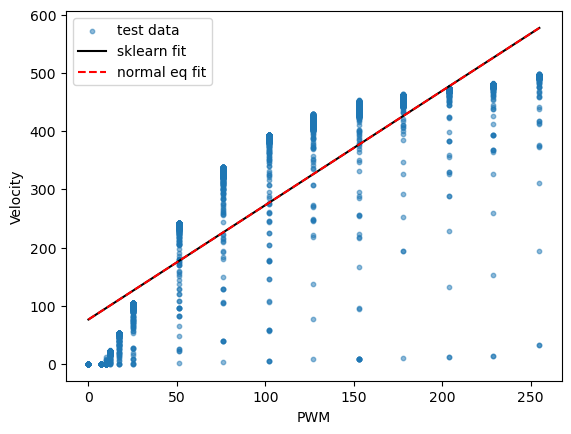

In [45]:
"""
4. Evaluate Models
- plot test data with both regression models on the same plot
- mean squared error for test set?
"""

# ---- Test MSEs ----
print(f"[SKLearn] Test MSE: {mse_test_sk:.6f}")

X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_pred_ne = X_test_b @ theta_ne
mse_test_ne = mean_squared_error(y_test, y_test_pred_ne)
print(f"[Normal Eq] Test MSE: {mse_test_ne:.6f}")

# ---- Compare to training MSE ----
print(f"[SKLearn] Train MSE: {mse_train_sk:.6f}")
print(f"[Normal Eq] Train MSE: {mse_train_ne:.6f}")

# ---- Plot test set + both fits ----
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_line_sk = sk_model.predict(x_line)
y_line_ne = intercept_ne + slope_ne * x_line

plt.scatter(X_test, y_test, s=10, alpha=0.5, label="test data")
plt.plot(x_line, y_line_sk, color="black", label="sklearn fit")
plt.plot(x_line, y_line_ne, color="red", linestyle="--", label="normal eq fit")
plt.xlabel("PWM")
plt.ylabel("Velocity")
plt.legend()
plt.show()
